<a href="https://colab.research.google.com/github/sergiogarciag/hado/blob/main/comparativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
municipio = '03031'
municipio = '24089'
municipio = '39075'


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/My Drive/UNIRTFM/resultados/mape_final.csv'
dfMAPE = pd.read_csv(path, sep=';' , header=0, names=['Municipio','Método', 'MAPE'], encoding='windows-1252')
dfMAPE['Municipio'] = dfMAPE['Municipio'].astype(str)
dfMAPE['Municipio'] = dfMAPE['Municipio'].str.zfill(5)
print(dfMAPE)


   Municipio            Método      MAPE
0      03031  Naive Estacional  0.236909
1      24089  Naive Estacional  0.301559
2      39075  Naive Estacional  0.298302
3      03031              LSTM  0.317303
4      24089              LSTM  0.397949
5      39075              LSTM  0.318846
6      03031           Prophet  0.154951
7      24089           Prophet  0.134756
8      39075           Prophet  0.128119
9      03031           SARIMAX  0.290772
10     24089           SARIMAX  0.428871
11     39075           SARIMAX  0.418192


Método         LSTM  Naive Estacional   Prophet   SARIMAX
Municipio                                                
03031      0.317303          0.236909  0.154951  0.290772
24089      0.397949          0.301559  0.134756  0.428871
39075      0.318846          0.298302  0.128119  0.418192
LSTM
Naive Estacional
Prophet
SARIMAX


<ipython-input-284-ba53c4d883b7>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Blues', len(methods))  # Puedes cambiar 'viridis' por otra paleta de colores


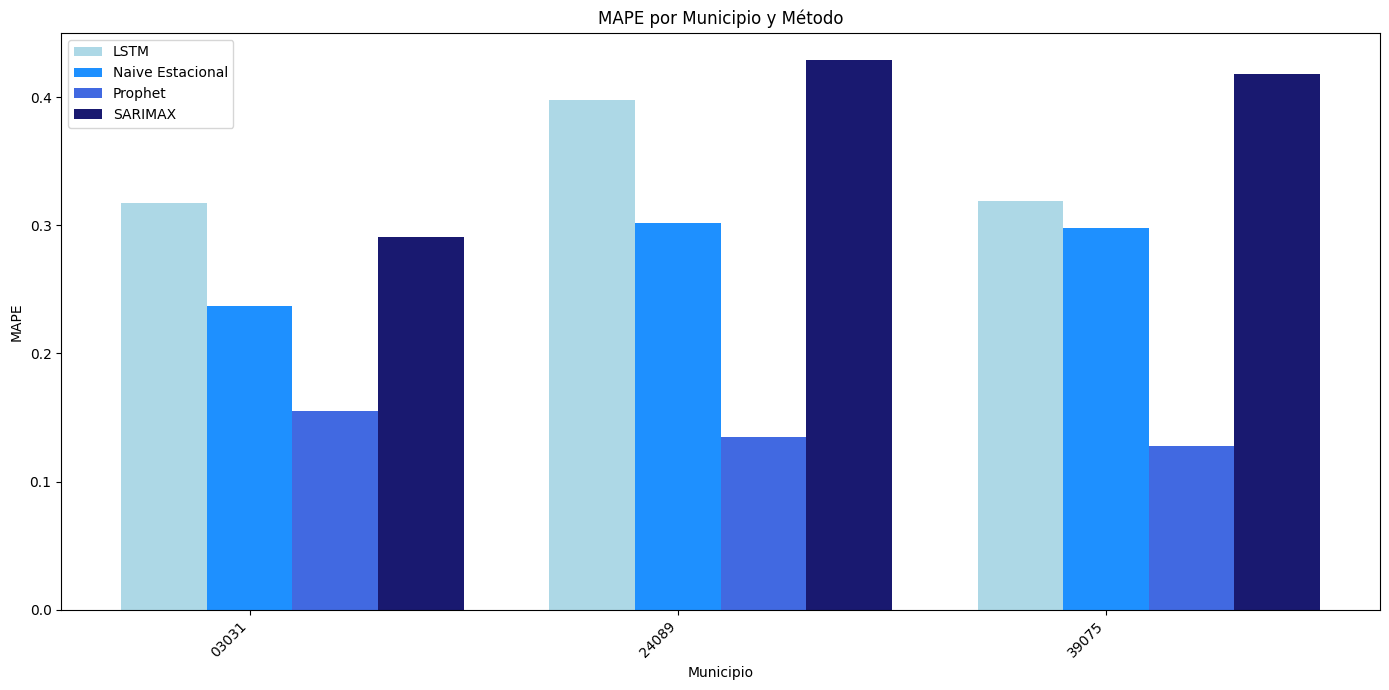

In [ ]:
from matplotlib.cm import get_cmap

# Agrupar los datos por "Municipio" y "Método"
municipio_method_groups = dfMAPE.groupby(['Municipio', 'Método'])['MAPE'].mean().unstack()
print(municipio_method_groups)
# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))

width = 0.2  # Ancho de cada barra
x = np.arange(len(municipio_method_groups))


# Crear una paleta de colores
methods = municipio_method_groups.columns

cmap = get_cmap('Blues', len(methods))  # Puedes cambiar 'viridis' por otra paleta de colores
colors = [cmap(i+1) for i in range(len(methods)+1)]

custom_colors = {
    methods[0]: 'lightblue',
    methods[1]: 'dodgerblue',
    methods[2]: 'royalblue',
    methods[3]: 'midnightblue',
}

# Iterar sobre los métodos y crear las barras
for i, method in enumerate(municipio_method_groups.columns):
    print(method)
    ax.bar(x + i * width, municipio_method_groups[method], width, label=method, color=custom_colors.get(method, 'gray'))
#color=colors.get(method, 'gray')
# Configurar las etiquetas del eje x
ax.set_xticks(x + width)
ax.set_xticklabels(municipio_method_groups.index, rotation=45, ha='right')

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Municipio')
ax.set_ylabel('MAPE')
ax.set_title('MAPE por Municipio y Método')

# Añadir una leyenda
ax.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
psarimax = '/content/drive/My Drive/UNIRTFM/resultados/sarimax'+municipio+'.csv'
dfsarimax = pd.read_csv(psarimax, sep=',' , header=0)
print(dfsarimax)

     Unnamed: 0          pred
0           730  12678.885884
1           731  16047.578733
2           732  14733.990194
3           733  13421.009069
4           734  12603.284827
..          ...           ...
135         865   3531.037588
136         866   5316.405660
137         867   8541.317688
138         868   8399.916149
139         869   4465.929043

[140 rows x 2 columns]


In [ ]:
pprophet = '/content/drive/My Drive/UNIRTFM/resultados/prophet_'+municipio+'.csv'
dfprophet = pd.read_csv(pprophet, sep=',' , header=0)
print(dfprophet['yhat'])

0       3893.111749
1       3773.763202
2       3729.132643
3       4379.296083
4       6866.901146
           ...     
168     7218.423846
169     7340.977649
170     7668.710580
171     8410.181143
172    11188.490705
Name: yhat, Length: 173, dtype: float64


In [ ]:
def cargar_municipio(municipio, provincia):
  with open('/content/drive/My Drive/UNIRTFM/data/pernoctaciones/'+municipio+'.csv', 'r') as f:
    dfPernoctas = pd.read_csv(f, sep='|' , header=0, names=['date','origen', 'destino','y'])
    dfPernoctas['ds'] = pd.to_datetime(dfPernoctas['date'], format='%Y%m%d', errors='coerce')
    dfPernoctas = dfPernoctas.drop('date', axis=1)
    dfPernoctas = dfPernoctas[dfPernoctas['destino'] ==municipio]
    dfPernoctas = dfPernoctas[~dfPernoctas['origen'].astype(str).str.startswith(municipio[0:2])]
    dfPernoctas_grouped = dfPernoctas.groupby(['ds','destino'])['y'].sum().reset_index()
    dfPernoctas_grouped.head()
    dfPernoctas_grouped['mes'] = dfPernoctas_grouped['ds'].dt.month
    dfPernoctas_grouped['anio'] = dfPernoctas_grouped['ds'].dt.year
    dfPernoctas_grouped['diasemana'] = dfPernoctas_grouped['ds'].dt.dayofweek
    dfPernoctas_grouped['findesemana'] = np.logical_or(dfPernoctas_grouped['ds'].dt.dayofweek == 5, dfPernoctas_grouped['ds'].dt.dayofweek == 6).astype(int)
    #dfPernoctas_grouped.set_index('ds', inplace=True)
    dfPernoctas_grouped = dfPernoctas_grouped.drop('destino', axis=1)
    return dfPernoctas_grouped


dfReal = cargar_municipio(municipio,'')
print(dfReal['y'])

0      11323.846
1      10900.624
2       8604.023
3       8340.414
4       7649.545
         ...    
899     8503.230
900     8754.362
901     9438.605
902    12390.128
903    13378.346
Name: y, Length: 904, dtype: float64


In [ ]:
plstm = '/content/drive/My Drive/UNIRTFM/resultados/lstm_2_100_'+municipio+'.csv'
dflstm = pd.read_csv(plstm, sep=',' , header=0)
print(dflstm)

     Unnamed: 0          0
0             0  6404.9580
1             1  6330.1390
2             2  6316.3190
3             3  6628.9614
4             4  6357.6440
..          ...        ...
163         163  6894.3520
164         164  6474.7104
165         165  6747.4478
166         166  6974.1180
167         167  7056.7524

[168 rows x 2 columns]


In [ ]:
pnaive = '/content/drive/My Drive/UNIRTFM/resultados/naiveestacional'+municipio+'.csv'
dfnaive = pd.read_csv(pnaive, sep=',' , header=0)
print(dfnaive)

             ds          y  diasemana  findesemana
0    2024-01-09  12600.943          1            0
1    2024-01-10  11511.299          2            0
2    2024-01-11  11136.232          3            0
3    2024-01-12  10512.751          4            0
4    2024-01-13  10418.256          5            1
..          ...        ...        ...          ...
168  2024-06-26   6290.544          2            0
169  2024-06-27   6948.351          3            0
170  2024-06-28   7582.264          4            0
171  2024-06-29  10698.955          5            1
172  2024-06-30  13457.358          6            1

[173 rows x 4 columns]


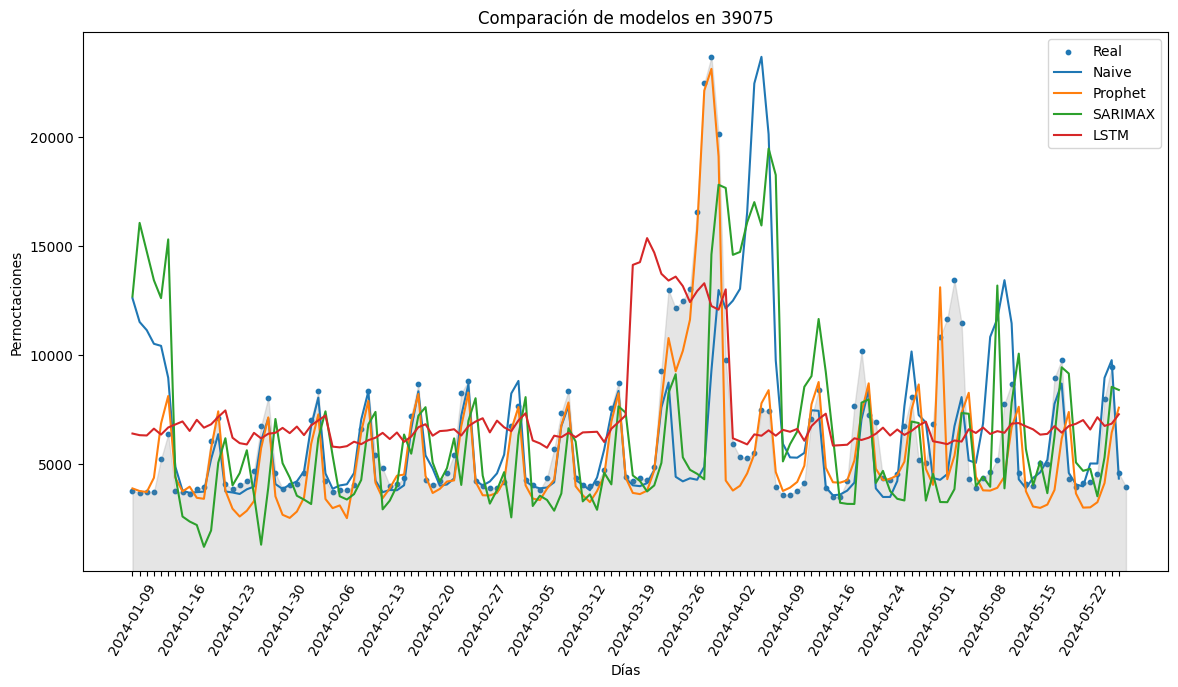

In [ ]:
# prompt: crear un grafico de puntos de dfreal['y'], empezando por la posicion 731 y reseteando el indices

etiquetas = [str(label)  if i % 7 == 0 else "" for i,label in enumerate( dfnaive.iloc[0:139]['ds'] )]

plt.figure(figsize=(14, 7))
plt.scatter(range(140),dfReal['y'][731:871].reset_index(drop=True), label='Real',s=10) #Plot starting at position 731 and reset index
plt.fill_between(range(140),dfReal['y'][731:871].reset_index(drop=True), color='gray', alpha=0.2)  # Relleno gris con transparencia

plt.plot(dfnaive.iloc[0:139]['ds'],dfnaive.iloc[0:139]['y'], label='Naive')
plt.plot(dfprophet.iloc[0:139]['yhat'], label='Prophet')
plt.plot(dfsarimax.iloc[0:139,1], label='SARIMAX')
plt.plot(dflstm.iloc[0:139,1], label='LSTM')
plt.xlabel('Días')
plt.ylabel('Pernoctaciones')
plt.xticks(dfnaive.iloc[0:139]['ds'],etiquetas,rotation=60)
plt.title('Comparación de modelos en '+ municipio)
plt.legend()
filename = '/content/drive/My Drive/UNIRTFM/figuras/comparacionmodelos_total'+municipio+'.png'
plt.savefig(filename)
plt.show()

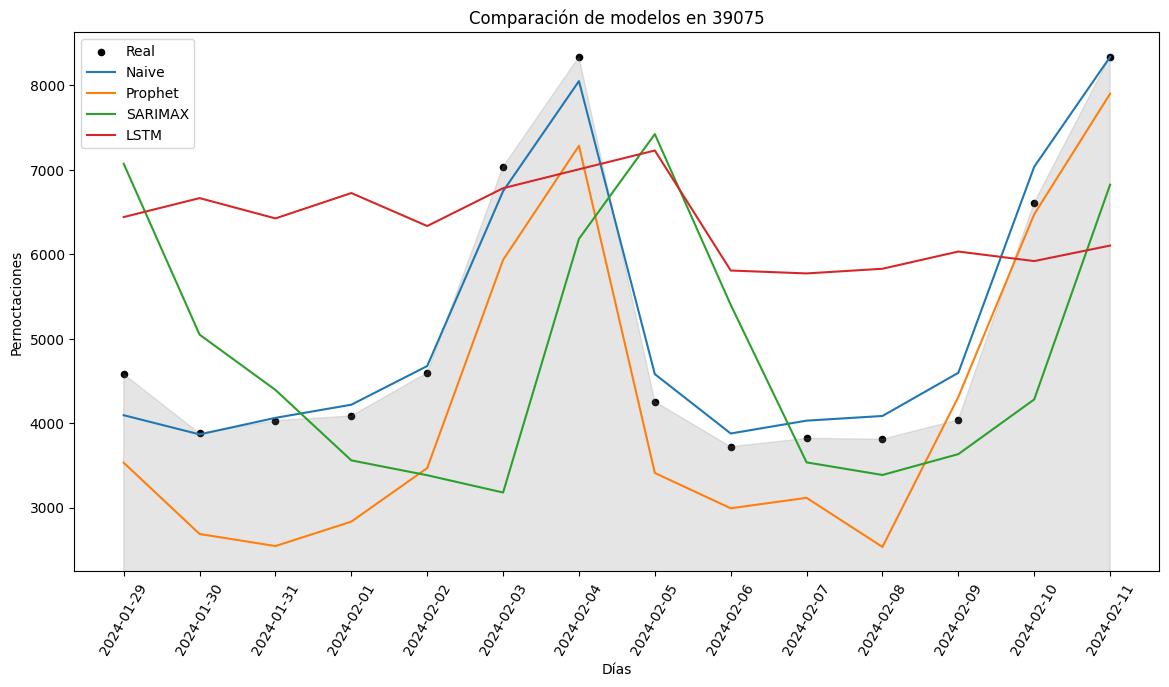

In [ ]:
desde=20
hasta=34
plt.figure(figsize=(14, 7))
etiquetas = [str(label)  if i % 7 == 0 else "" for i,label in enumerate( dfnaive.iloc[desde:hasta]['ds'] )]
plt.scatter(range(hasta-desde),dfReal['y'][731+desde:731+hasta].reset_index(drop=True), color='black',label='Real',s=20) #Plot starting at position 731 and reset index

plt.fill_between(range(hasta-desde),dfReal['y'][731+desde:731+hasta].reset_index(drop=True), color='gray', alpha=0.2)  # Relleno gris con transparencia

plt.plot(dfnaive.iloc[desde:hasta]['ds'].reset_index(drop=True),dfnaive.iloc[desde:hasta]['y'].reset_index(drop=True), label='Naive')
plt.plot(dfprophet.iloc[desde:hasta]['yhat'].reset_index(drop=True), label='Prophet')
plt.plot(dfsarimax.iloc[desde:hasta,1].reset_index(drop=True), label='SARIMAX')
plt.plot(dflstm.iloc[desde:hasta,1].reset_index(drop=True), label='LSTM')
plt.xlabel('Días')
plt.ylabel('Pernoctaciones')
plt.xticks(rotation=60)

plt.title('Comparación de modelos en '+ municipio)
plt.legend()
filename = '/content/drive/My Drive/UNIRTFM/figuras/comparacionmodelos_semanatipo_'+municipio+'.png'
plt.savefig(filename)
plt.show()

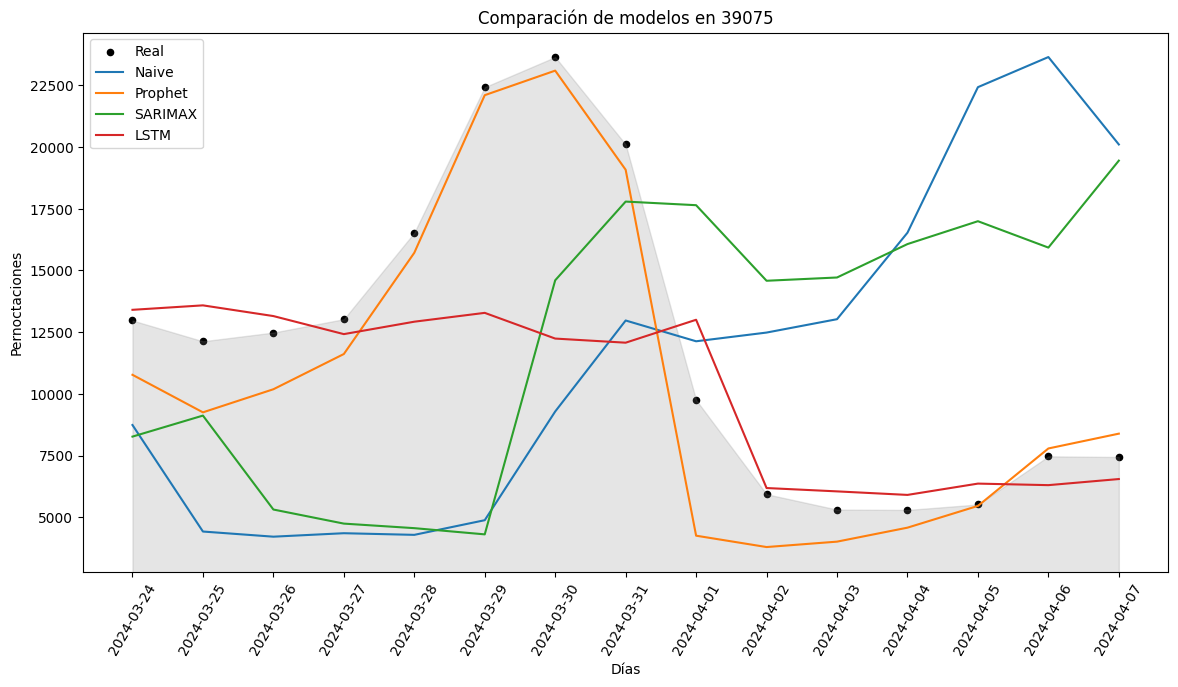

In [ ]:
desde=75
hasta=90
plt.figure(figsize=(14, 7))
plt.scatter(range(hasta-desde),dfReal['y'][731+desde:731+hasta].reset_index(drop=True), color='black',label='Real',s=20) #Plot starting at position 731 and reset index

plt.fill_between(range(hasta-desde),dfReal['y'][731+desde:731+hasta].reset_index(drop=True), color='gray', alpha=0.2)  # Relleno gris con transparencia

plt.plot(dfnaive.iloc[desde:hasta]['ds'].reset_index(drop=True),dfnaive.iloc[desde:hasta]['y'].reset_index(drop=True), label='Naive')
plt.plot(dfprophet.iloc[desde:hasta]['yhat'].reset_index(drop=True), label='Prophet')
plt.plot(dfsarimax.iloc[desde:hasta,1].reset_index(drop=True), label='SARIMAX')
plt.plot(dflstm.iloc[desde:hasta,1].reset_index(drop=True), label='LSTM')
plt.xlabel('Días')
plt.ylabel('Pernoctaciones')
plt.title('Comparación de modelos en ' + municipio)
plt.xticks(rotation=60)

plt.legend()
filename = '/content/drive/My Drive/UNIRTFM/figuras/comparacionmodelos_semanasanta_'+municipio+'.png'
plt.savefig(filename)
plt.show()

In [ ]:
dfMAPE14d = pd.DataFrame(columns=['Municipio', 'Salto'])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
metodo = 'Naive Estacional'
mape_list = []

for i in range(14):
  mape= mean_absolute_percentage_error (dfReal['y'][731:871].reset_index(drop=True).iloc[i::14],dfnaive.iloc[0:140]['y'].iloc[i::14])
  mape_list.append({'Salto': i, 'Municipio': municipio, 'Método': metodo, 'MAPE': mape})


df = pd.DataFrame(mape_list)
dfMAPE14d = pd.concat([dfMAPE14d, df], ignore_index=True)



In [ ]:
metodo = 'SARIMAX'
mape_list = []

for i in range(14):
  mape= mean_absolute_percentage_error (dfReal['y'][731:871].reset_index(drop=True).iloc[i::14],dfsarimax.iloc[0:140,1].iloc[i::14])
  mape_list.append({'Salto': i, 'Municipio': municipio, 'Método': metodo, 'MAPE': mape})


df = pd.DataFrame(mape_list)
dfMAPE14d = pd.concat([dfMAPE14d, df], ignore_index=True)

#dfprophet.iloc[0:139]['yhat']
#dfsarimax.iloc[0:139,1]
#dflstm.iloc[0:139,1]


In [ ]:
metodo = 'Prophet'
mape_list = []

for i in range(14):
  mape= mean_absolute_percentage_error (dfReal['y'][731:871].reset_index(drop=True).iloc[i::14],dfprophet.iloc[0:140]['yhat'].iloc[i::14])
  mape_list.append({'Salto': i, 'Municipio': municipio, 'Método': metodo, 'MAPE': mape})


df = pd.DataFrame(mape_list)
dfMAPE14d = pd.concat([dfMAPE14d, df], ignore_index=True)

#dfprophet.iloc[0:139]['yhat']
#dfsarimax.iloc[0:139,1]
#dflstm.iloc[0:139,1]

In [ ]:


filename = f'/content/drive/My Drive/UNIRTFM/resultados/mape14d_{municipio}.csv'
dfMAPE14d.to_csv(filename, index=False)


In [ ]:
metodo = 'LSTM'
mape_list = []

for i in range(14):
  mape= mean_absolute_percentage_error (dfReal['y'][731:871].reset_index(drop=True).iloc[i::14],dflstm.iloc[0:140,1].iloc[i::14])
  mape_list.append({'Salto': i, 'Municipio': municipio, 'Método': metodo, 'MAPE': mape})


df = pd.DataFrame(mape_list)
dfMAPE14d = pd.concat([dfMAPE14d, df], ignore_index=True)


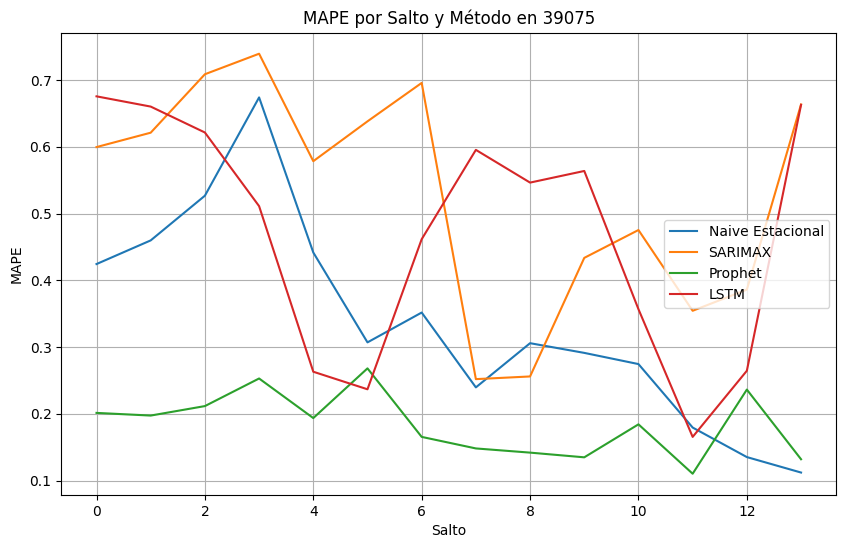

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for method in dfMAPE14d['Método'].unique():
    subset = dfMAPE14d[dfMAPE14d['Método'] == method]
    plt.plot(subset['Salto'], subset['MAPE'], label=method)

plt.xlabel('Salto')
plt.ylabel('MAPE')
plt.title('MAPE por Salto y Método en ' + municipio)
plt.legend()
plt.grid(True)
filename = '/content/drive/My Drive/UNIRTFM/figuras/mape_por_salto_'+municipio+'.png'
plt.savefig(filename)
plt.show()

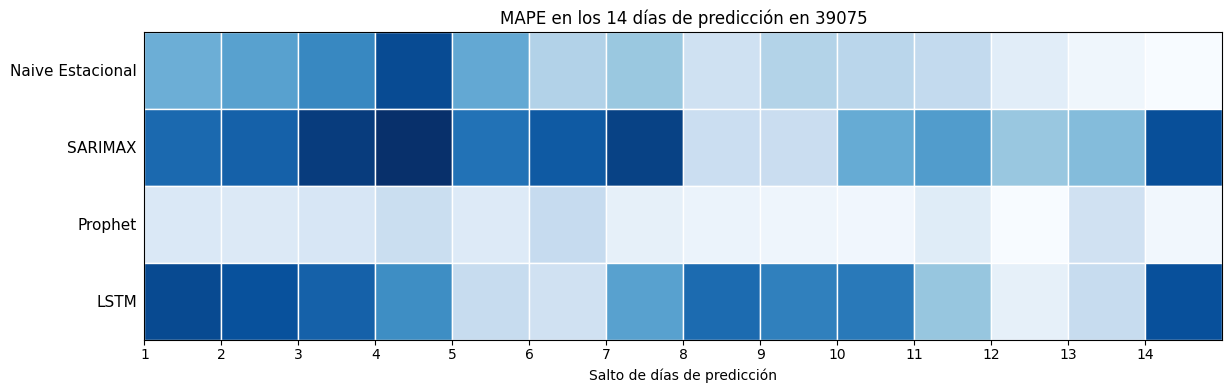

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def waffle_chart(data, rows, cols, title):
    total_tiles = rows * cols
    proportions = data['MAPE'] / data['MAPE'].sum()
    tile_counts = (proportions * total_tiles).round().astype(int)

    fig, ax = plt.subplots(figsize=(cols, rows))
    ax.set_aspect('equal')

    cmap = plt.cm.Blues
    norm = plt.Normalize(data['MAPE'].min(), data['MAPE'].max())

    tile_index = 0
    for row in range(rows):
        ax.text(-0.1 ,3.5-row,data['Método'].iloc[tile_index] , ha='right',va='center', fontsize=11)
        print ()
        for col in range(cols):
            if tile_index < total_tiles:
                value = data['MAPE'].iloc[tile_index] if tile_index < len(data) else 0
                #print (data['Método'].iloc[tile_index] +',' + str( data['MAPE'].iloc[tile_index] ))
                color = cmap(norm(value))
                ax.add_patch(plt.Rectangle((col, rows - row - 1), 1, 1, facecolor=color, edgecolor='white'))
                tile_index += 1

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(range(cols))
    ax.set_xticklabels(range(1, cols + 1))
    ax.tick_params(axis='x', pad=2)
    ax.set_yticks([])
    ax.set_xlabel("Salto de días de predicción")
    ax.set_title(title)
    filename = '/content/drive/My Drive/UNIRTFM/figuras/waffersalto_'+municipio+'.png'
    plt.savefig(filename)
    plt.show()

waffle_chart(dfMAPE14d, 4, 14, "MAPE en los 14 días de predicción en " + municipio)

In [ ]:
def calcular_residuos(dfmetodo):
  residuo = dfReal['y'][731:871].reset_index(drop=True) - dfmetodo
  return residuo

resNaive = calcular_residuos(dfnaive.iloc[0:139]['y'])
resProphet = calcular_residuos(dfprophet.iloc[0:139]['yhat'])
resSARIMAX = calcular_residuos(dfsarimax.iloc[0:139,1])
resLSTM = calcular_residuos(dflstm.iloc[0:139,1])

In [ ]:
print(resNaive)

0     -8805.828
1     -7820.948
2     -7414.274
3     -6766.084
4     -5184.189
         ...   
135    -483.111
136    -963.500
137    -325.156
138     238.931
139         NaN
Name: y, Length: 140, dtype: float64


<Figure size 1400x700 with 0 Axes>

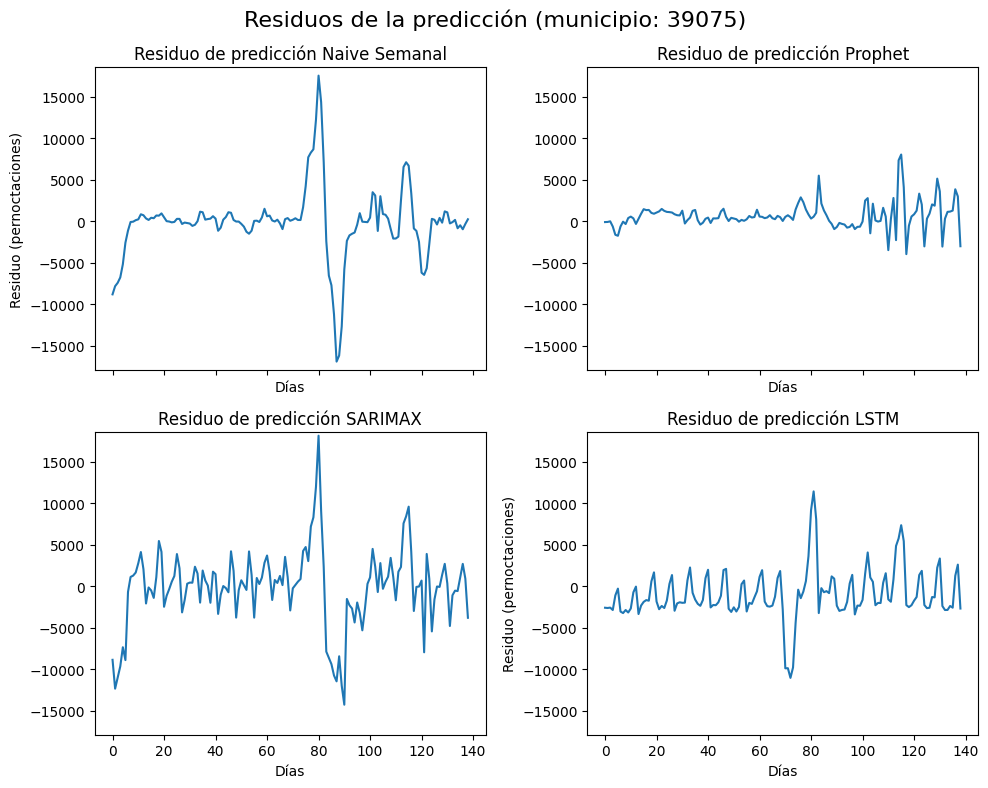

In [ ]:
plt.figure(figsize=(14, 7))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)


ymin=resNaive.min()-1000
ymax=resNaive.max()+1000
axs[0,0].plot(resNaive)
axs[0,0].set_ylim(ymin, ymax)
axs[0,0].set_title('Residuo de predicción Naive Semanal')
axs[0,0].set_xlabel('Días')
axs[0,0].set_ylabel('Residuo (pernoctaciones)')

axs[0,1].plot(resProphet)
axs[0,1].set_ylim(ymin, ymax)
axs[0,1].set_xlabel('Días')

axs[0,1].set_title('Residuo de predicción Prophet')
axs[1,0].plot(resSARIMAX)
axs[1,0].set_ylim(ymin, ymax)
axs[1,0].set_xlabel('Días')

axs[1,0].set_title('Residuo de predicción SARIMAX')
axs[1,1].plot(resLSTM)
axs[1,1].set_ylim(ymin, ymax)
axs[1,1].set_xlabel('Días')
axs[1,1].set_ylabel('Residuo (pernoctaciones)')

axs[1,1].set_title('Residuo de predicción LSTM')

fig.suptitle('Residuos de la predicción (municipio: ' + municipio+')', fontsize=16)
plt.tight_layout()
filename = '/content/drive/My Drive/UNIRTFM/figuras/residuos_modelos_'+municipio+'.png'
plt.savefig(filename)
plt.show()

In [ ]:
print(resNaive)

0     -8805.828
1     -7820.948
2     -7414.274
3     -6766.084
4     -5184.189
         ...   
135    -483.111
136    -963.500
137    -325.156
138     238.931
139         NaN
Name: y, Length: 140, dtype: float64


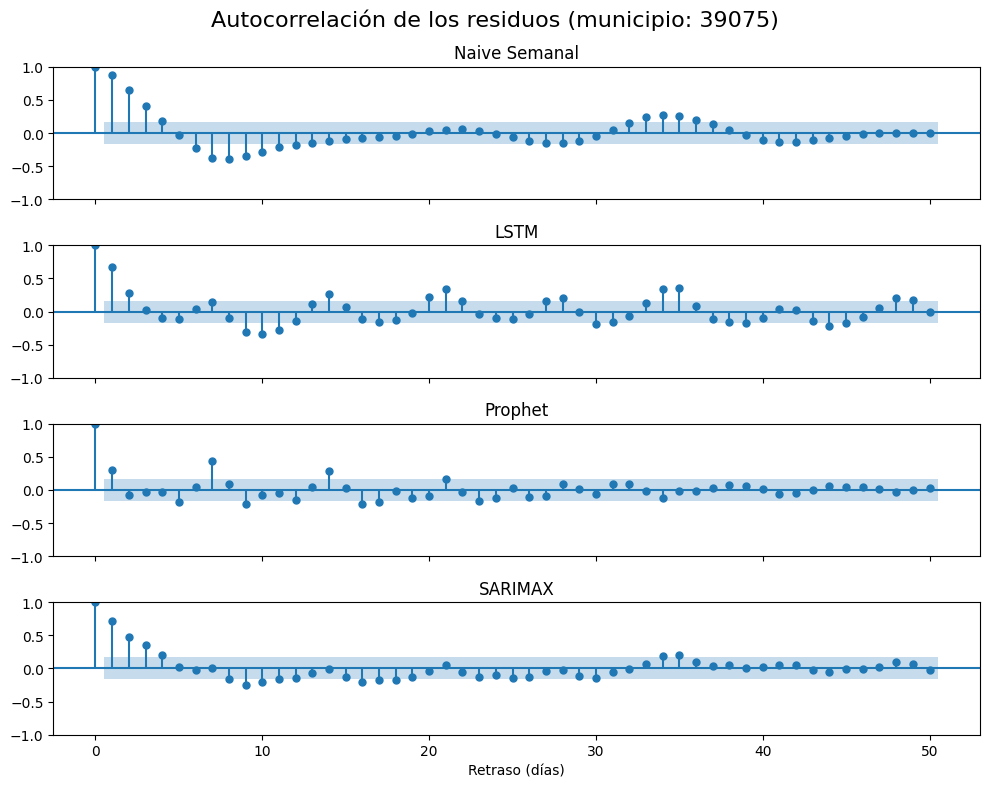

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)
plot_acf(resNaive.iloc[0:139], ax=axs[0], lags=50, alpha=0.05,bartlett_confint = False)
axs[0].set_title('Naive Semanal')

plot_acf(resLSTM.iloc[0:139], ax=axs[1], lags=50, alpha=0.05,bartlett_confint = False)
axs[1].set_title('LSTM')

plot_acf(resProphet.iloc[0:139], ax=axs[2], lags=50, alpha=0.05,bartlett_confint = False)
axs[2].set_title('Prophet')

plot_acf(resSARIMAX.iloc[0:139], ax=axs[3], lags=50, alpha=0.05,bartlett_confint = False)
axs[3].set_title('SARIMAX')

axs[3].set_xlabel('Retraso (días)')

fig.suptitle('Autocorrelación de los residuos (municipio: ' + municipio + ')', fontsize=16)
plt.tight_layout()



filename = '/content/drive/My Drive/UNIRTFM/figuras/resacf_' + municipio + '.png'
plt.savefig(filename)


In [ ]:
import statsmodels.api as sm

In [ ]:
ljung_box = pd.DataFrame([{'Naive' : sm.stats.acorr_ljungbox(resNaive.iloc[0:139], lags=[10], return_df=True)['lb_pvalue'].values[0],
'LSTM' : sm.stats.acorr_ljungbox(resLSTM.iloc[0:139], lags=[10], return_df=True)['lb_pvalue'].values[0],
'Prophet' : sm.stats.acorr_ljungbox(resProphet.iloc[0:139], lags=[10], return_df=True)['lb_pvalue'].values[0],
'SARIMAX' : sm.stats.acorr_ljungbox(resSARIMAX.iloc[0:139], lags=[10], return_df=True)['lb_pvalue'].values[0]} ])

print(ljung_box)
ljung_box.to_csv('/content/drive/My Drive/UNIRTFM/resultados/ljung_box_' + municipio + '.csv', index=False)


          Naive          LSTM       Prophet       SARIMAX
0  9.926895e-55  3.499168e-20  2.969932e-08  5.152112e-27


In [ ]:
from scipy.stats import shapiro

shapirowilk = pd.DataFrame([{'Naive' : shapiro(resNaive.iloc[0:139])[1],
'LSTM' : shapiro(resLSTM.iloc[0:139])[1],
'Prophet' : shapiro(resProphet.iloc[0:139])[1],
'SARIMAX' : shapiro(resSARIMAX.iloc[0:139])[1]} ])

print(shapirowilk)
shapirowilk.to_csv('/content/drive/My Drive/UNIRTFM/resultados/shapiro_wilk_' + municipio + '.csv', index=False)


          Naive          LSTM       Prophet   SARIMAX
0  9.119309e-13  3.914604e-10  2.472784e-09  0.000002
